Group - Shivani Gupta, Divyesh Harit

# Vast Challenge - 2011, Mini Challenge 1 - Characterization of an Epidemic Spread
<br>
Goal - A major epidemic has started in the city of Vastopolis. The task is to analyze the data and determine how the epidemic is being spread and whether or not it is contained. The origin of the epidemic must also be identified.
Dataset - Microblogging messages with geolocations and a map

## Algorithms

Get word counts, TF-IDF features for tweets - Will help in clustering alogrithms and also in visualization
<br>
**Clustering** - <br>
    **Based on Location** - To see location where people are more active or totally inactive (if active then we can see what kind of message were coming in, whether epidemic is being spread or is contained, how are people reacting)
<br>
    **Based on Date/Time** - Will give a sense or a trend of how messages were changing with time (it could be either change in count or change in the context)<br>
    **Based on Messages** - Will help in grouping messages<br><br>
These 3 clustering results should give a good picture of the epidemic spread. We should be able to answer questions like how it started, how it is spreading, all affected aread and whether it is contained or not. <br>
<br>
**Classification** -<br>
    Messages - Classifying messages into related to epidemic/disease and non-related will help in visualizing the results better. Infact, we can even run the clustering algorithms on the messages related to disease/epidemic. 

## Similar Dataset
We decided to go with US twitter dataset present here - http://www.followthehashtag.com/datasets/free-twitter-dataset-usa-200000-free-usa-tweets/
It has 200k tweets with geolocations, date and time. We selected this set as it was a close match with our mini challenge dataset.

# Classification
We didn't run any classification algorithm on this. Instead,we looked at the dataset and decided to select rows where tweet had the word "#earthquake" and decided to do clustering on that to get a pattern. 

In [9]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import bokeh
from bokeh.charts import Scatter
from bokeh.io import output_notebook,output_file
from bokeh.layouts import layout
from bokeh.models import Label
from bokeh.plotting import figure, show
output_notebook()

Loading BokehJS ...

In [23]:
# read data and select #earthquake related tweets
df = pd.read_excel('tweets1.xlsx')
df = df[['Tweet content','Latitude','Longitude', 'Date', 'Hour']]
data = df.loc[df['Tweet content'].str.contains("#earthquake")]

In [24]:
## word count, tf-idf features
###it is included in clustering by tweet content, there we first get word, count and tf-idf features

# Clustering

## By Location

In [25]:
##Clustering by location
k_means = cluster.KMeans(6)
latlong = data.as_matrix(columns=['Latitude', 'Longitude'])
k_means.fit(latlong)
data['cluster'] = k_means.labels_
#plot = figure(width=550, height=550, title='K-means, 8 clusters', x_axis_label = "Grocery", y_axis_label = "Delicassen")
#plot.scatter(latlong[])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
colors = np.array([x for x in ('#00f', '#0f0', '#f00', '#0ff', '#f0f', '#ff0')])
plot = figure(width=550, height=550, title='Clustering Tweets by Location', x_axis_label = "Latitude", y_axis_label = "Longitude")
plot.scatter(latlong[:,0],latlong[:,1], color = colors[k_means.labels_].tolist())
show(plot)

# By Tweets
<br>
We clustered tweets by bag of words and used PCA to transform the data and visualize it in 2d. 

In [27]:
##Clustering by bag of words
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(data["Tweet content"].tolist()).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

In [28]:
kmeans = cluster.KMeans(6)
kmeans.fit(X)
plot = figure(width=550, height=550, title='Clustering By Tweets')
plot.scatter(data2D[:,0], data2D[:,1],color=colors[k_means.labels_].tolist())
show(plot) 

# By Date/Time
<br> The similar dataset didnt have tweets from very different times so we can just group the tweets by time and date. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


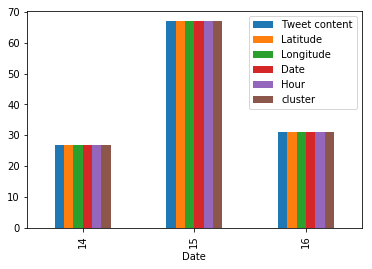

In [29]:
data["Date"] = data["Date"].astype("datetime64")
%matplotlib inline
data.groupby(data["Date"].dt.day).count().plot(kind="bar")

# Algorithms on Mini Challenge
<br> We will have to implement a classification algo or use word-count/tf-idf features (output these out from clustering by tweets code) to classify tweets into related and non-related. Clustering should work well. We might have to try different clustering algorithms and then select the best. 

# Visualizations

<br> For now, we have plotted only static graphs to see if the alogrithms were running correctly or not. To see a pattern between time, location and the content of the tweets, we will need interactive visualizations. A word cloud/or a heat map using the tf-idf features should help us to get terms for classification of tweets. One visualization to connect all three clustering results and see the trend (how other changes when you change one or what happens when you select few tweets). Have widgets to change clustering algorithm used and the number of clusters.